In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\pkeer\\Downloads\\archive (10)\\ecommerce_customer_data_large.csv")
df.rename(columns={
    'Customer ID': 'CustomerID',
    'Purchase Date': 'PurchaseDate',
    'Product Category': 'ProductCategory',
    'Product Price': 'UnitPrice',
    'Total Purchase Amount': 'TotalAmount',
    'Payment Method': 'PaymentMethod',
    'Customer Age': 'CustomerAge',
    'Returns': 'Returns',
    'Customer Name': 'CustomerName',
    'Age': 'Age',
    'Gender': 'Gender',
    'Churn': 'Churn'
}, inplace=True)

In [2]:
df.head(5)

,CustomerID,PurchaseDate,ProductCategory,UnitPrice,Quantity,TotalAmount,PaymentMethod,CustomerAge,Returns,CustomerName,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [3]:
df.tail(5)

,CustomerID,PurchaseDate,ProductCategory,UnitPrice,Quantity,TotalAmount,PaymentMethod,CustomerAge,Returns,CustomerName,Age,Gender,Churn
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0
249999,4148,2020-09-07 05:12:19,Home,307,5,3634,Cash,32,0.0,Angela Norton,32,Male,0


In [4]:
#Convert data types
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')


In [5]:
df.dropna(subset=['CustomerID', 'PurchaseDate', 'UnitPrice', 'Quantity'], inplace=True)

In [6]:
df['TotalAmount'] = df['UnitPrice'] * df['Quantity']

In [7]:
df['TransactionDate'] = df['PurchaseDate'].dt.date 

In [8]:
# RFM Analysis
NOW = df['PurchaseDate'].max()
rfm = df.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (NOW - x.max()).days,  # Recency: Days since last purchase
    'TransactionDate': 'nunique',  # Frequency: Number of unique dates (transactions)
    'TotalAmount': 'sum'  # Monetary: Total amount spent
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [9]:
df['Returned'] = df['Returns'].apply(lambda x: 1 if x == 'Yes' else 0)
return_rate = df.groupby('CustomerID')['Returned'].mean().reset_index()
rfm = rfm.merge(return_rate, on='CustomerID')

In [10]:
customer_info = df[['CustomerID', 'CustomerAge', 'Gender', 'Churn']].drop_duplicates()
rfm = rfm.merge(customer_info, on='CustomerID', how='left')

In [11]:
df['PurchaseMonth'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

In [12]:
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary  Returned  CustomerAge  Gender  \
0           1      288          3      5600       0.0           67  Female   
1           2       72          6      6459       0.0           42  Female   
2           3      222          4      3613       0.0           31    Male   
3           4      441          5      4339       0.0           37    Male   
4           5      424          5      2263       0.0           24  Female   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0  


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CustomerID       250000 non-null  int64         
 1   PurchaseDate     250000 non-null  datetime64[ns]
 2   ProductCategory  250000 non-null  object        
 3   UnitPrice        250000 non-null  int64         
 4   Quantity         250000 non-null  int64         
 5   TotalAmount      250000 non-null  int64         
 6   PaymentMethod    250000 non-null  object        
 7   CustomerAge      250000 non-null  int64         
 8   Returns          202618 non-null  float64       
 9   CustomerName     250000 non-null  object        
 10  Age              250000 non-null  int64         
 11  Gender           250000 non-null  object        
 12  Churn            250000 non-null  int64         
 13  TransactionDate  250000 non-null  object        
 14  Returned         250

In [14]:
print(df.describe())


          CustomerID                   PurchaseDate      UnitPrice  \
count  250000.000000                         250000  250000.000000   
mean    25017.632092  2021-11-06 19:26:22.286192384     254.742724   
min         1.000000            2020-01-01 00:07:26      10.000000   
25%     12590.000000            2020-12-03 08:10:12     132.000000   
50%     25011.000000     2021-11-06 07:39:08.500000     255.000000   
75%     37441.250000  2022-10-11 01:21:56.249999872     377.000000   
max     50000.000000            2023-09-13 18:42:49     500.000000   
std     14412.515718                            NaN     141.738104   

            Quantity    TotalAmount    CustomerAge        Returns  \
count  250000.000000  250000.000000  250000.000000  202618.000000   
mean        3.004936     765.954660      43.798276       0.500824   
min         1.000000      10.000000      18.000000       0.000000   
25%         2.000000     288.000000      30.000000       0.000000   
50%         3.000000    

In [15]:
print(df.isnull().sum())

CustomerID             0
PurchaseDate           0
ProductCategory        0
UnitPrice              0
Quantity               0
TotalAmount            0
PaymentMethod          0
CustomerAge            0
Returns            47382
CustomerName           0
Age                    0
Gender                 0
Churn                  0
TransactionDate        0
Returned               0
PurchaseMonth          0
DayOfWeek              0
dtype: int64


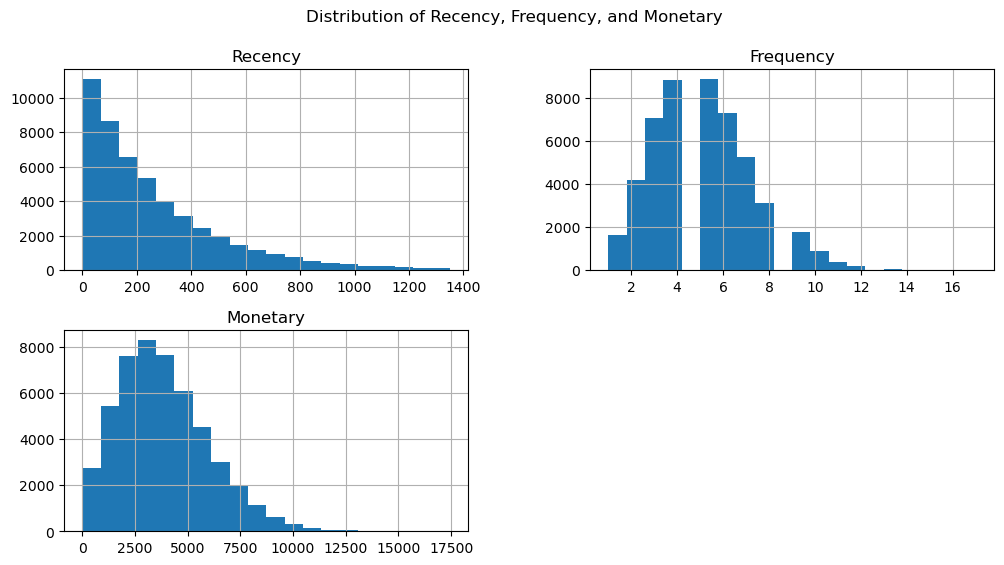

C:\Users\pkeer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


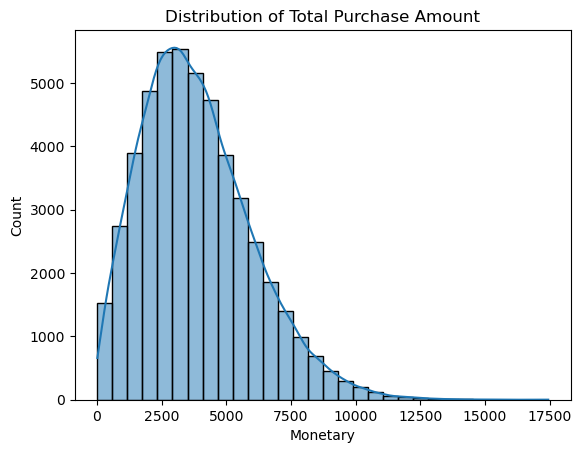

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for Recency, Frequency, and Monetary
rfm[['Recency', 'Frequency', 'Monetary']].hist(figsize=(12, 6), bins=20)
plt.suptitle('Distribution of Recency, Frequency, and Monetary')
plt.show()

# Plot TotalAmount distribution
sns.histplot(rfm['Monetary'], kde=True, bins=30)
plt.title('Distribution of Total Purchase Amount')
plt.show()

In [17]:
df = df.merge(rfm, on='CustomerID', how='left')

In [18]:
df.columns = df.columns.str.strip()

In [19]:
print(df.columns.tolist())

['CustomerID', 'PurchaseDate', 'ProductCategory', 'UnitPrice', 'Quantity', 'TotalAmount', 'PaymentMethod', 'CustomerAge_x', 'Returns', 'CustomerName', 'Age', 'Gender_x', 'Churn_x', 'TransactionDate', 'Returned_x', 'PurchaseMonth', 'DayOfWeek', 'Recency', 'Frequency', 'Monetary', 'Returned_y', 'CustomerAge_y', 'Gender_y', 'Churn_y']


In [20]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())

['customerid', 'purchasedate', 'productcategory', 'unitprice', 'quantity', 'totalamount', 'paymentmethod', 'customerage_x', 'returns', 'customername', 'age', 'gender_x', 'churn_x', 'transactiondate', 'returned_x', 'purchasemonth', 'dayofweek', 'recency', 'frequency', 'monetary', 'returned_y', 'customerage_y', 'gender_y', 'churn_y']


In [21]:
churn_analysis = df.groupby('churn_x').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

print(churn_analysis)

   churn_x     recency  frequency     monetary
0        0  217.226953   5.979086  4587.678406
1        1  215.314881   5.994036  4606.886615


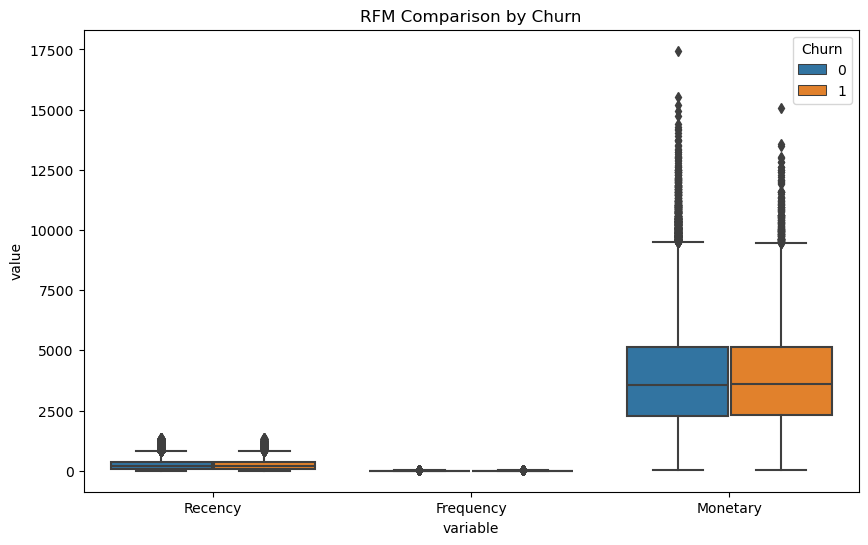

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

melted = rfm.melt(id_vars='Churn', value_vars=['Recency', 'Frequency', 'Monetary'])

plt.figure(figsize=(10,6))
sns.boxplot(x='variable', y='value', hue='Churn', data=melted)
plt.title('RFM Comparison by Churn')
plt.show()

In [23]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

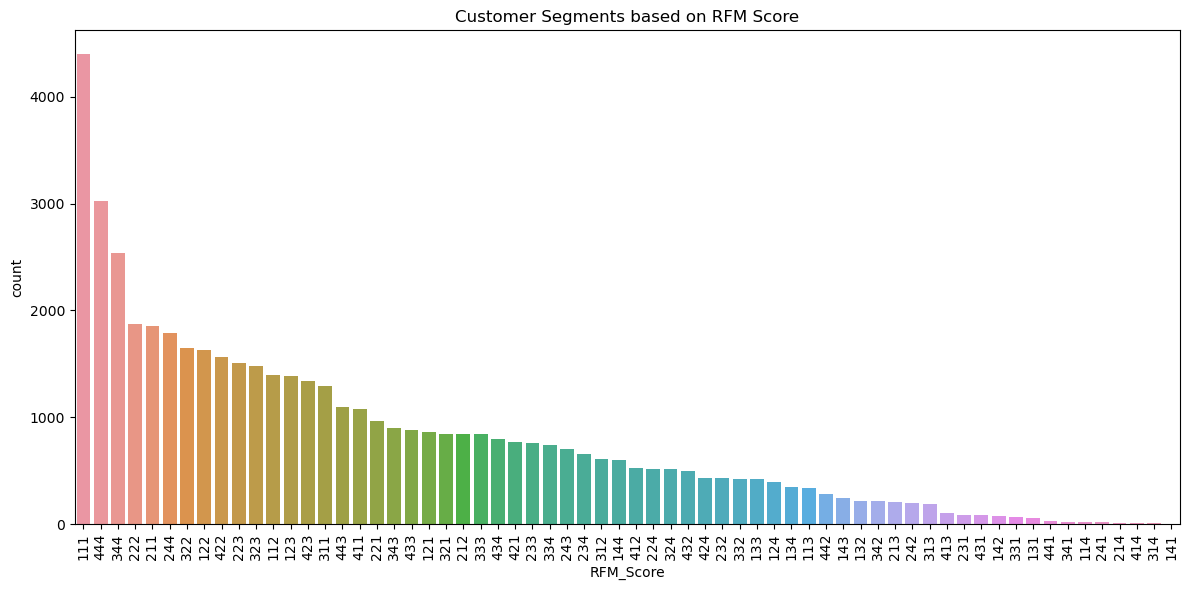

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='RFM_Score', data=rfm, order=rfm['RFM_Score'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Customer Segments based on RFM Score')
plt.tight_layout()
plt.show()

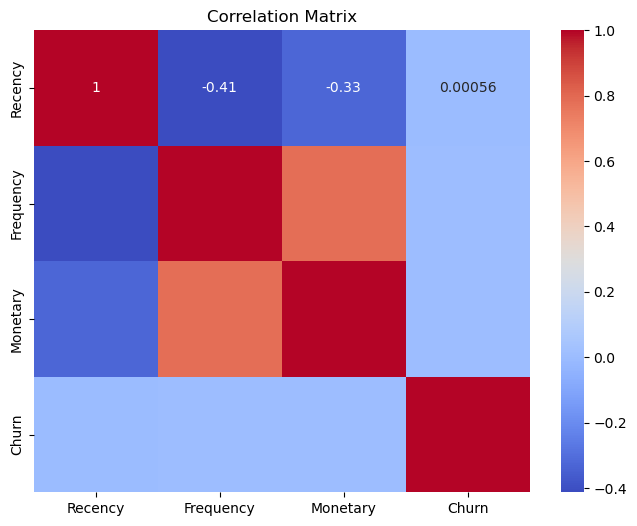

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     11901
           1       0.00      0.00      0.00      2998

    accuracy                           0.80     14899
   macro avg       0.40      0.50      0.44     14899
weighted avg       0.64      0.80      0.71     14899



C:\Users\pkeer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pkeer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pkeer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


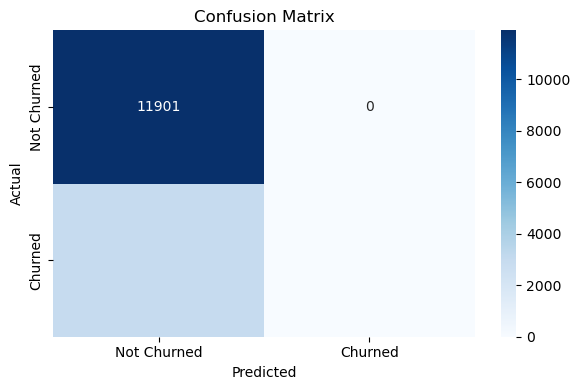

In [27]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

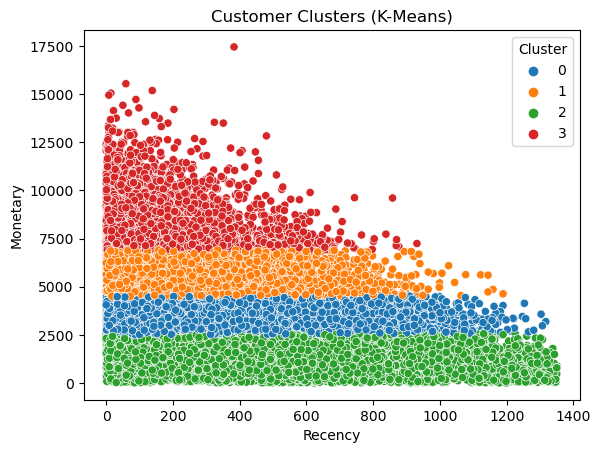

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Customer Clusters (K-Means)')
plt.show()

In [29]:
rfm.to_csv("rfm_churn_segmented.csv", index=False)
print("Segmented RFM data saved as 'rfm_churn_segmented.csv'")

Segmented RFM data saved as 'rfm_churn_segmented.csv'
